In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

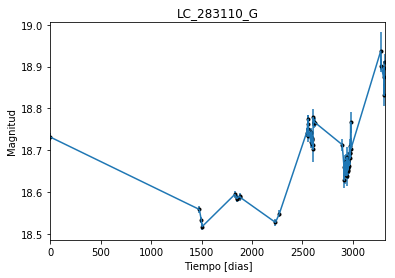

In [2]:
data = np.genfromtxt('LC_283110_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_283110_G')
plt.savefig("LC_283110_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

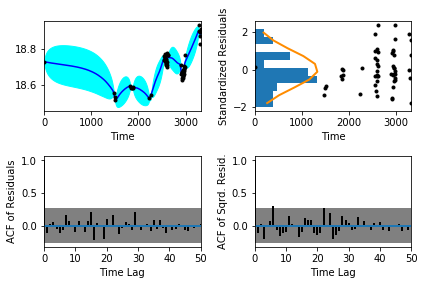

In [5]:
sample.assess_fit()

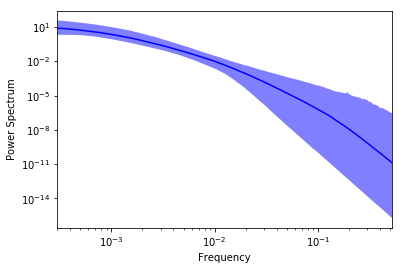

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

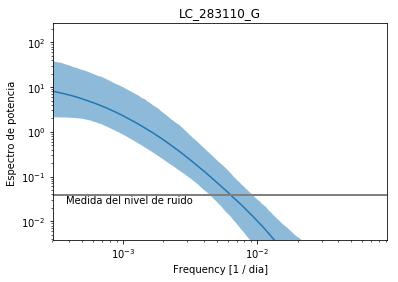

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_283110_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_283110_G')

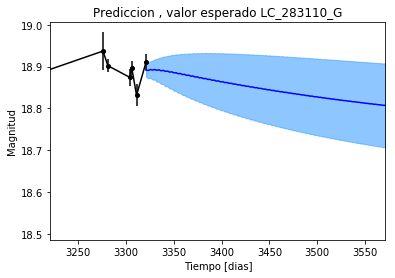

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_283110_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_283110_G')

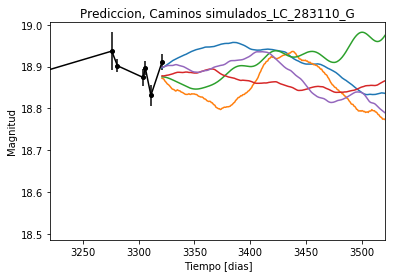

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_283110_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


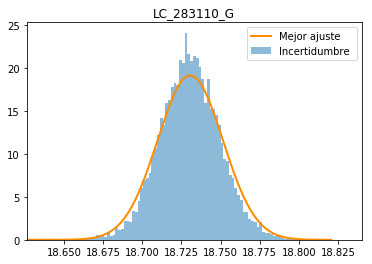

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_283110_G')
plt.savefig("Mejor_ajuste_LC_283110_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_283110_G')

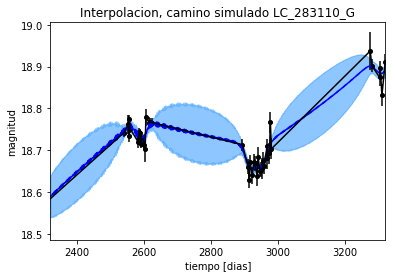

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_G')

Text(0.5,1,'Interpolacion, camino simulado LC_283110_G')

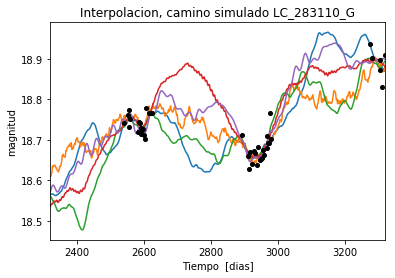

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_283110_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 729.751563126
Median: 0.0308254519328
Standard deviation: 0.223876041783
68% credibility interval: [ 0.00254834  0.27552341]
95% credibility interval: [  4.87553607e-04   8.89001626e-01]
99% credibility interval: [  3.24901660e-04   9.99659607e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 501.444132517
Median: 0.00527037547418
Standard deviation: 0.0904034313631
68% credibility interval: [ 0.00058779  0.03941475]
95% credibility interval: [ 0.000332    0.27824125]
99% credibility interval: [  3.06094937e-04   6.64298241e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 417.617362759
Median: 0.0152411697187
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1140.86405431
Median: 138.219053222
Standard deviation: 1.88763924462
68% credibility interval: [ 136.14043771  139.62175717]
95% credibility interval: [ 133.10119573  140.33890773]
99% credibility interval: [ 130.98195423  140.62801198]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 313.497299627
Median: 0.816103340526
Standard deviation: 2.23314148149
68% credibility interval: [ 0.0811947   4.10493504]
95% credibility interval: [ 0.02819964  7.34544153]
99% credibility interval: [  0.01239875  10.08389233]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 557.726233007
Median: 0.976539113985
Standard deviation: 8.98210304006
68% credibility interval: [ 0.07180808  8.48401753]
95% credibility interval: [  5.19867411e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12416.2500983
Median: 7.94328714539e-59
Standard deviation: 6.95581648382e+137
68% credibility interval: [  3.09096399e-117   2.11559653e-020]
95% credibility interval: [  3.20843318e-172   2.36304686e+001]
99% credibility interval: [  2.90130647e-209   6.36848963e+098]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1778.25486491
Median: 18.6936256835
Standard deviation: 0.0749323045502
68% credibility interval: [ 18.63714012  18.76413876]
95% credibility interval: [ 18.55388434  18.85278923]
99% credibility interval: [ 18.46929244  18.94931372]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 472.494247688
Median: 0.0143442701051
Standard deviation: 0.246950838833
68% credibility interval: [ 0.          0.36888312]
95% credibility interval: [ 0.          0.89345345]
99% credibility interval: [ 0.          1.00047349]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 472.494247688
Median: 0.0143442701051
Standard deviation: 0.246950838833
68% credibility interval: [ 0.          0.36888312]
95% credibility interval: [ 0.          0.89345345]
99% credibility interval: [ 0.          1.00047349]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2213.02616697
Median: 0.0
Standard deviation: 0.000306728336252
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1140.86405431
Median: 138.219053222
Standard deviation: 1.88763924462
68% credibility interval: [ 136.14043771  139.62175717]
95% credibility interval: [ 133.10119573  140.33890773]
99% credibility interval: [ 130.98195423  140.62801198]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1424.81901553
Median: 0.0175606054267
Standard deviation: 0.0204832671825
68% credibility interval: [ 0.01047287  0.03317082]
95% credibility interval: [ 0.00709859  0.07212541]
99% credibility interval: [ 0.00537126  0.14022955]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1775.44853805
Median: 1.13069305699
Standard deviation: 0.182901826723
68% credibility interval: [ 0.96910357  1.33000414]
95% credibility interval: [ 0.83807135  1.55474258]
99% credibility interval: [ 0.76971501  1.71175724]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 493.865966273
Median: 0.000450773264272
Standard deviation: 0.0476425700887
68% credibility interval: [  2.24252303e-05   5.42956335e-03]
95% credibility interval: [  3.00365224e-07   4.43632182e-02]
99% credibility interval: [  6.62569294e-102   3.20485685e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 729.751563126
Median: (-0.193682026672+0j)
Standard deviation: 2.09433938023
68% credibility interval: [-1.73116465+0.j         -0.01601168-1.77609871j]
95% credibility interval: [ -5.58576195e+00+0.j          -3.06338966e-03-0.12516797j]
99% credibility interval: [ -6.28104656e+00+0.j          -2.04141734e-03-0.07097017j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 501.444132517
Median: (-0.0331147457427+0.278106362889j)
Standard deviation: 1.65234032664
68% credibility interval: [-0.24765019+0.17201585j -0.00369321+1.54285958j]
95% credibility interval: [-1.74824135+4.65718481j -0.00208602+0.j        ]
99% credibility interval: [ -4.17390895e+00+2.88049526j  -1.92325121e-03+0.j        ]
Posterior summary for para